## Natural Language Processing - Summer Term 2024
### Hochschule Karlsruhe
### Lecturer: Prof. Dr. Jannik Strötgen
### Tutor: Paul Löhr
### Group 6: Paul, Vlad, Flo

# Exercise 06 Part 1

### You will learn about:

- Text Similarity
- Levenshtein (Edit) Distance
- TF-IDF Vectors and Cosine Similarity
---

## Task 1 - Levenshtein Distance (pen and paper):

### Part 1:
Calculate the Levenshtein distance between words 
- "signed" and "sealed"

Fill out the edit distance table like it is shown on the lecture slides.

|     |   | S | E | A | L | E | D |
|-----|---|---|---|---|---|---|---|
|     | 0 | 1 | 2 | 3 | 4 | 5 | 6 |  
| S   | 1 | 0 | 1 | 2 | 3 | 4 | 5 |
| I   | 2 | 1 | 1 | 2 | 3 | 4 | 5 |
| G   | 3 | 2 | 2 | 2 | 3 | 4 | 5 |
| N   | 4 | 3 | 3 | 3 | 3 | 4 | 5 |
| E   | 5 | 4 | 3 | 4 | 4 | 3 | 4 |
| D   | 6 | 5 | 4 | 4 | 5 | 4 | 3 |

---

### Part 2: 
What is the advantage and disadvantage of this method for measuring word similarity?

Advantages:
- Simple and direct way to measure the similarity between two words
- Efficient because its feasible even for big datasets (wagner-fischer algorithm, complexity of O(n * m))
- Can be used to detect and correct typos
- Language-agnostic, it can be used to compare words of different languages (because its on character-level)

Disadvantages:
- Measuring the similarity on character level does not include the meaning of the words in the calculation
  - e.g. using Levenshtein distance the words Love and Life are very similar, altough their semantic difference
- Has problems with calculating the distance between words with different length 
  - e.g. even if one of the words is partly included in the other, the levenshtein distance can still be large, just because one of the words is longer than the other
- Doesnt account for character order
  - e.g. the words "tree" and "eert" look pretty similar but still have a levenshtein distance of 4    

---

## Task 2 - Text Similarity:

### Part 1:
Given the Corpus calculate the:

- TERM FREQUENCY MATRIX -> each document is represented by a count vector
- TF-IDF MATRIX -> each document is represented with  a real-valued vector of tf-idf weights

After calculating the vectors for each document in the corpus visualize the Matrix with sns.heatmap()

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
corpus = [
    "dogs like happy cats",
    "happy cats and dogs are cute",
    "cats are happy",
    "dogs are dogs and not cats",
    "dogs like to play",
    "cats do not like dogs",
    "happy cats like happy dogs"
]

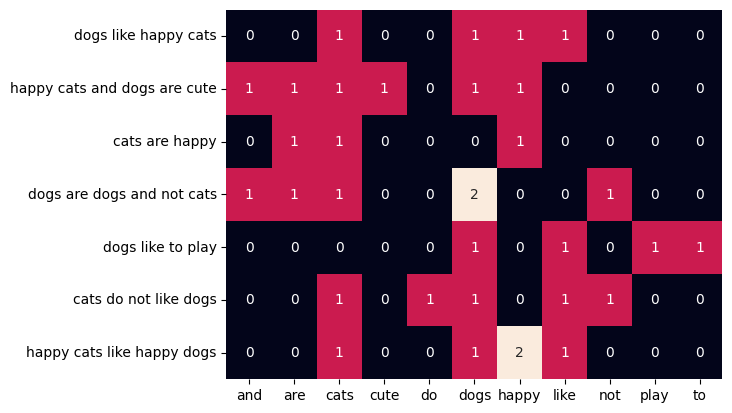

In [33]:
# intialize the vectorizer and fit the corpus to create the term frequency matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
tf_matrix = X.toarray()

# plotting the term frequency matrix as a heatmap
sns.heatmap(tf_matrix, annot= True, cbar= False, xticklabels=vectorizer.get_feature_names_out(), yticklabels= corpus)
plt.show()

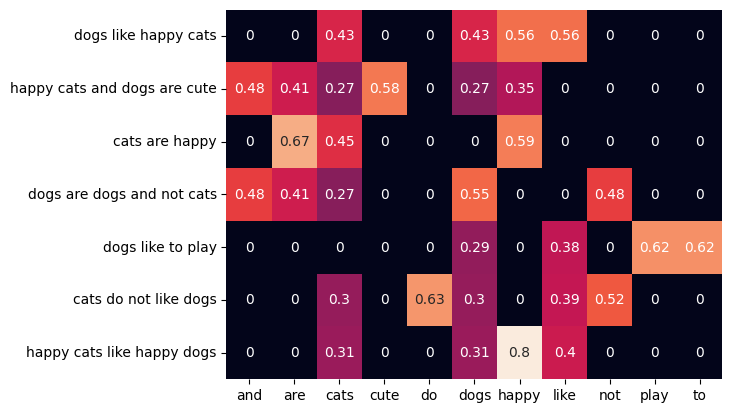

In [30]:
# initialze the tfidf vectorizer and fit the corpus to create the tfidf matrix
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tfidf_matrix = X.toarray()

# plotting the tfidf matrix as a heatmap
sns.heatmap(tfidf_matrix, annot= True, cbar= False, xticklabels= vectorizer.get_feature_names_out(), yticklabels=corpus)
plt.show()

---

### Part 2:
Given the TF-IDF MATRIX:

- Calculate the cosine_similartity() between all documents

After calculating the similarities visualize the Matrix with sns.heatmap()

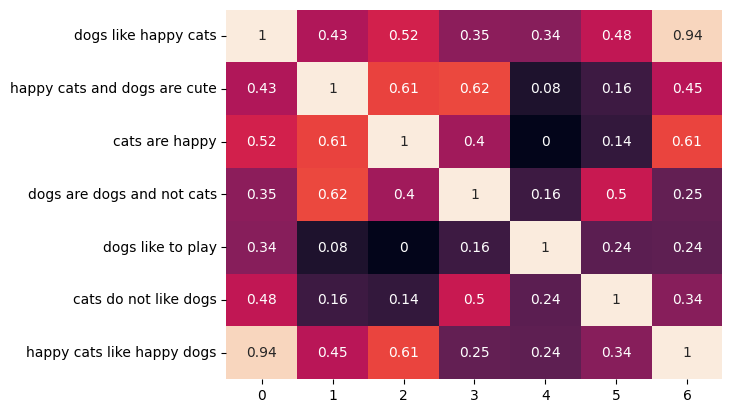

In [36]:
# calculating the cosine similarity between the documents and plotting the similarity matrix as a heatmap
cos_sim = cosine_similarity(tfidf_matrix)
sns.heatmap(cos_sim, annot=True, cbar=False, yticklabels= corpus) #yticklabels= corpus)
plt.show()

---

### Part 3:
Discuss the results of the SIMILARITY MATRIX:

- Cosine Similarity is computed pairwise
  - e.g. 0.43 is the similarity between the embedding vectors at index 0 and 1. Hence, it makes sense that our similarity matrix is symetrical.
Obviously the similiarity for the same sentence is 1.
- The more of the same words the two sentences use the higher is the similiarity
  - e.g. "dogs like happy cats" and "happy cats like happy dogs" are very similiar and the more words differ the lower is the similiarity score e.g. "dogs like happy cats" and "dogs are dogs and not cats

---

## Task 2 - Search Engine:

### Part 1:
Create the function search(query). Calculate the TF-IDF Vector for the query and match it with all document vectors of the corpus using the cosine_similarity(). Rank all documents by cosine_similarity().

In [39]:
def search(query: str, corpus: list, TfidfVect: bool = True):
    """
    args: 
        query: str - query string to search for in the corpus
        corpus: list - list of strings, each string represents a document
        TfidfVect: bool - if True, use TfidfVectorizer, otherwise use CountVectorizer
    
    returns:
        ranked_results: list - ranked list of tuples, each containing the document id, the document (sentence), and the cosine similarity score
    """

    # Create a tfidf vectorizer and fit the coprus
    vectorizer = TfidfVectorizer() if TfidfVect else CountVectorizer()
    X = vectorizer.fit_transform(corpus)

    # Use the tfidf vectorizer to transform the query and calculate the cosine similarity between the query and the corpus
    query_vector = vectorizer.transform([query])
    similarity_scores = cosine_similarity(query_vector, X).flatten()

    # Enumerate threw the similarity scores and document ids, sort them by the similarity scores and reverse the order to descending
    ranked_scores_and_doc_id = []
    for i, score in enumerate(similarity_scores):
        ranked_scores_and_doc_id.append((score, i))
    ranked_scores_and_doc_id.sort(reverse=True)

    # Create a list of tuples containing the document id, the document, and the cosine similarity score
    ranked_results = []
    for score, doc_id in ranked_scores_and_doc_id:
        ranked_results.append((f"id: {doc_id}", f"doc: {corpus[doc_id]}", f"score: {score}"))

    return ranked_results

In [53]:
search(query= 'happy cats', corpus= corpus, TfidfVect= True)

[('id: 6', 'doc: happy cats like happy dogs', 'score: 0.8258990910537658'),
 ('id: 2', 'doc: cats are happy', 'score: 0.7388271139701719'),
 ('id: 0', 'doc: dogs like happy cats', 'score: 0.7071067811865477'),
 ('id: 1', 'doc: happy cats and dogs are cute', 'score: 0.44738878158059536'),
 ('id: 5', 'doc: cats do not like dogs', 'score: 0.1827318631888128'),
 ('id: 3', 'doc: dogs are dogs and not cats', 'score: 0.16719925992820953'),
 ('id: 4', 'doc: dogs like to play', 'score: 0.0')]

---

#### Submitting your results:

To submit your results, please:

- save this file, i.e., `ex??_assignment.ipynb`.
- if you reference any external files (e.g., images), please create a zip or rar archive and put the notebook files and all referenced files in there.


**Remarks:**
    
- Do not copy any code from the Internet. In case you want to use publicly available code, please, add the reference to the respective code snippet.
- Check your code compiles and executes, even after you have restarted the Kernel.
- Submit your written solutions and the coding exercises within the provided spaces and not otherwise.
- Write the names of your partner and your name in the top section.